In [92]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [93]:
train_df = pd.read_csv('Data/CO2 Emissions in Rwanda/train.csv')
X_train = train_df.drop(columns='emission')
y_train = train_df['emission']

In [94]:
X_test = pd.read_csv('Data/CO2 Emissions in Rwanda/test.csv')
y_test = pd.read_csv('Data/CO2 Emissions in Rwanda/sample_submission.csv')['emission']

In [95]:
train_df

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.510,29.290,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,ID_-3.299_30.301_2021_48,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,...,5459.185355,60657.101913,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214,29.404171
79019,ID_-3.299_30.301_2021_49,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,...,5606.449457,60168.191528,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469,29.186497
79020,ID_-3.299_30.301_2021_50,-3.299,30.301,2021,50,NaN,NaN,NaN,NaN,NaN,...,6222.646776,56596.027209,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166,29.131205
79021,ID_-3.299_30.301_2021_51,-3.299,30.301,2021,51,-0.000034,0.879397,-0.000028,0.184209,-100.344827,...,7896.456885,46533.348194,6946.858022,32.594768,0.274047,8.427699,48.295652,-139.447849,29.112868,28.125792


In [96]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

In [97]:
train_df.shape

(79023, 76)

In [98]:
missing_percentage = (((train_df.isnull().sum() / len(train_df)) * 100).sort_values(ascending=False))

In [99]:
missing_percentage[missing_percentage > 75].index

Index(['UvAerosolLayerHeight_aerosol_height',
       'UvAerosolLayerHeight_solar_zenith_angle',
       'UvAerosolLayerHeight_solar_azimuth_angle',
       'UvAerosolLayerHeight_sensor_azimuth_angle',
       'UvAerosolLayerHeight_aerosol_pressure',
       'UvAerosolLayerHeight_aerosol_optical_depth',
       'UvAerosolLayerHeight_sensor_zenith_angle'],
      dtype='object')

In [100]:
X_train = X_train.drop(columns=missing_percentage[missing_percentage > 75].index)
X_test = X_test.drop(columns=missing_percentage[missing_percentage > 75].index)

In [101]:
X_train = X_train.drop(columns=['ID_LAT_LON_YEAR_WEEK'])
X_test = X_test.drop(columns=['ID_LAT_LON_YEAR_WEEK'])

In [107]:
mask = ~X_train.isnull().any(axis=1)
X_train = X_train[mask]
y_train = y_train[mask]

In [108]:
mask = ~X_test.isnull().any(axis=1)
X_test = X_test[mask]
y_test = y_test[mask]

In [111]:
X_train['year'].unique()

array([2019, 2020, 2021], dtype=int64)

In [112]:
correlation = X_train.corr()

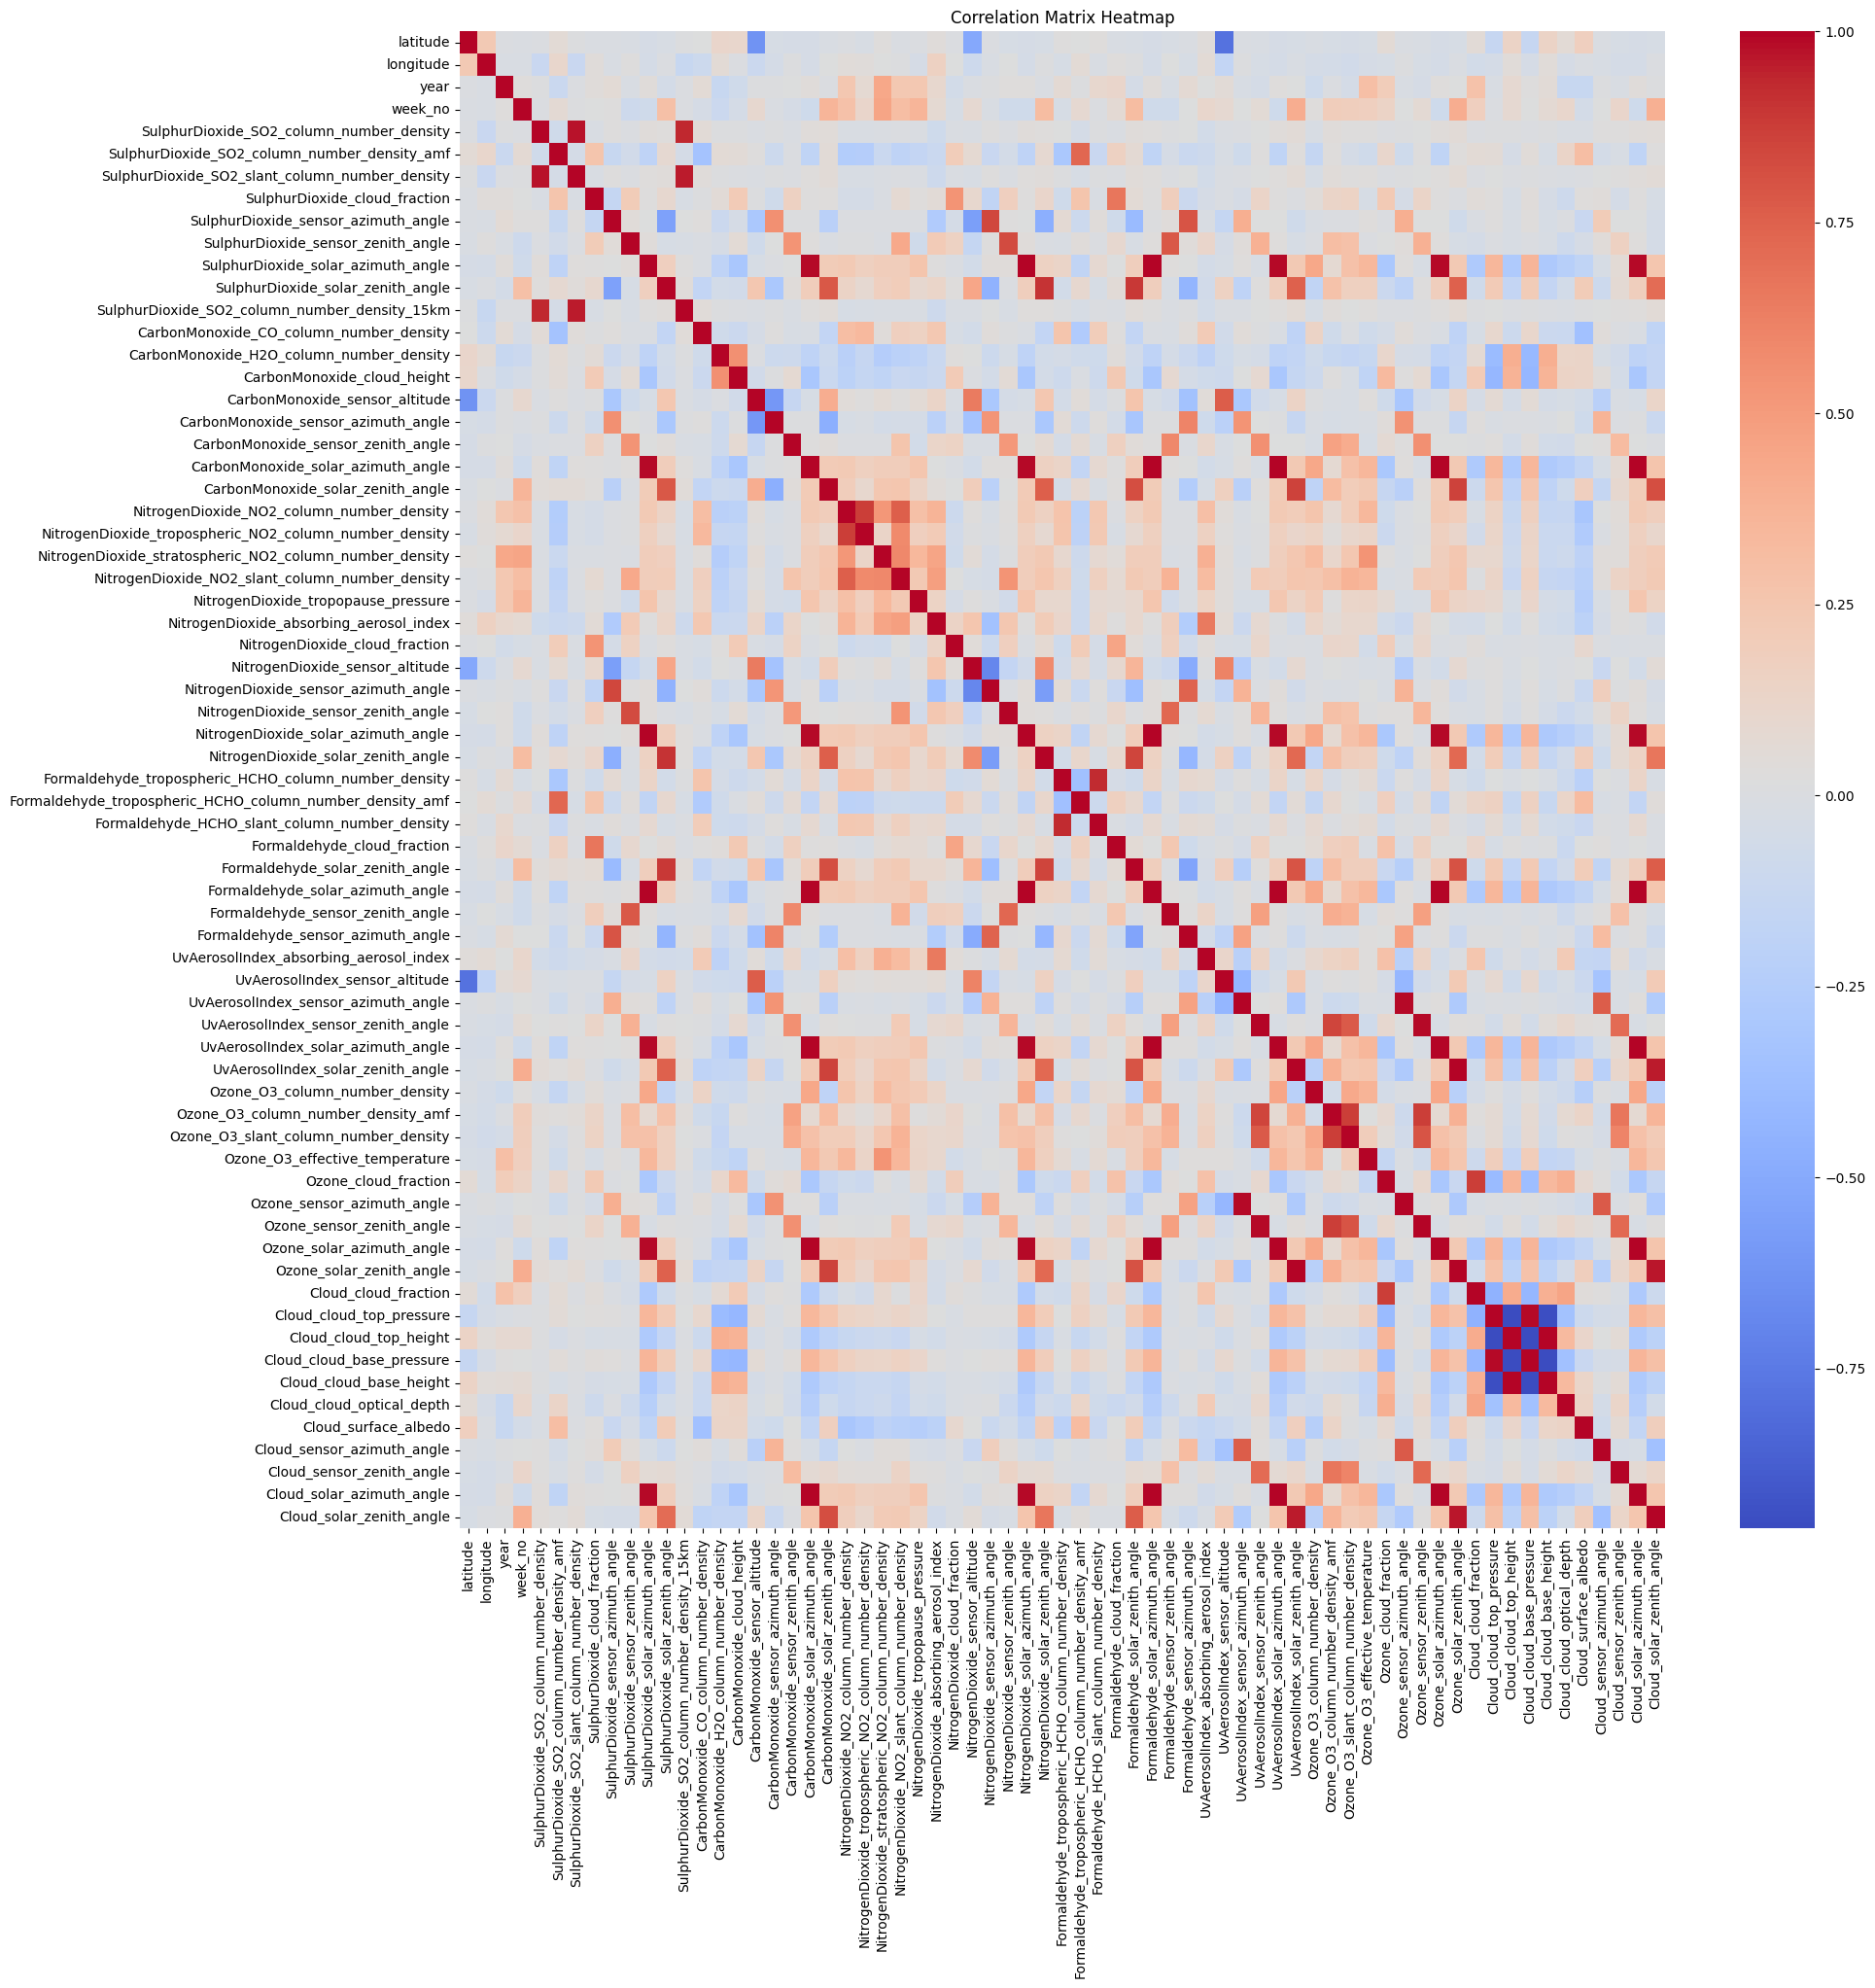

In [113]:
# Create a heatmap using Seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(correlation, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [114]:
from sklearn.feature_selection import VarianceThreshold

In [115]:
# Set the threshold value (you can experiment with different values)
threshold_value = 0.1

# Create VarianceThreshold object
selector = VarianceThreshold(threshold=threshold_value)

# Fit and transform the feature matrix
X_selected = selector.fit_transform(X_train)

# Get the selected features
selected_features = X_train.columns[selector.get_support()]

In [116]:
len(selected_features)

46

In [117]:
X_train.shape

(57209, 67)

In [118]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [119]:
X_train.shape

(57209, 67)

In [120]:
y_train.shape

(57209,)

In [125]:
# Import necessary libraries
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [127]:
# Instantiate the Ridge Regression model
alpha = 1.0  # Regularization strength, you can adjust this parameter
ridge_reg = Ridge(alpha=alpha)

# Fit the model to the training data
ridge_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 631.1946812328466
